# ABR Example Notebook

This notebook demonstrates end-to-end ABR peak detection, QC, and visualization using the Peak_Finding_Toolbox.  
**Dataset:** Placeholder for ABR recordings from a cohort (N=20 subjects, 1000 sweeps each) originally published in Maddox & Polonenko (2021).  

---

## 1. Setup and Imports

In [1]:
# From repository root:
import os, sys
from pathlib import Path
# Repo root is parent directory of this notebook
repo_root = Path().resolve().parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))
    
%pip install -e .

import numpy as np
import matplotlib.pyplot as plt
from toolbox.data_loader import load_data
from toolbox.peak_finder import _detect_peaks_abr
from toolbox.plotting import plot_abr

Obtaining file:///mnt/c/Users/Brody/OneDrive/Documents/Coding/GitHub/Peak_Finding_Toolbox/usage_examples
ERROR: file:///mnt/c/Users/Brody/OneDrive/Documents/Coding/GitHub/Peak_Finding_Toolbox/usage_examples does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
Note: you may need to restart the kernel to use updated packages.


---

## 2. Load Sample ABR Data (Placeholder)

In [2]:
# # Placeholder path to a single-subject ABR WAV file
# abr_path = '[BIDS file path]'

# # Load waveform (μV) and time vector (ms)
# # Underlying data: 1000 sweeps averaged, 50–3000 Hz bandpass
# # (Maddox & Polonenko, 2021)
# data_uv, times_ms = load_data(abr_path, sr=100000)

# # Display shapes and metadata
# print(f"Data shape: {data_uv.shape} samples")
# print(f"Time span: {times_ms[0]:.1f}–{times_ms[-1]:.1f} ms")


# Instead of real ABR, for simplicity we'll synthesize a typical ABR waveform using Gaussian peaks
# Define latencies for Waves I-V (ms)
latencies = np.array([1.5, 3.5, 5.5, 7.0, 9.0])
amplitudes = np.array([0.3, 0.6, 1.0, 0.8, 0.5])  # relative µV amplitudes

duration_ms = 12.0
fs = 100000  # 100 kHz sampling
times_ms = np.linspace(0, duration_ms, int(duration_ms * fs / 1000))
# Build signal: sum of Gaussians
data_uv = np.zeros_like(times_ms)
for lat, amp in zip(latencies, amplitudes):
    data_uv += amp * np.exp(-0.5 * ((times_ms - lat) / 0.2) ** 2)
# Add baseline noise
data_uv += 0.05 * np.random.randn(len(times_ms))

print(f"Synthetic data shape: {data_uv.shape} samples")
print(f"Time span: {times_ms[0]:.1f}–{times_ms[-1]:.1f} ms")

Synthetic data shape: (1200,) samples
Time span: 0.0–12.0 ms


---

## 3. Detect ABR Peaks (Waves I–V)

In [3]:
# Detect Waves I–V using default parameters
n_peaks = 5
base_sigma = 0.06  # ms
peaks, qc_flag = _detect_peaks_abr(
    data_uv,
    times_ms,
    n_peaks=n_peaks,
    base_sigma=base_sigma
)

# Report latencies
wave_labels = ['I', 'II', 'III', 'IV', 'V']
for idx, label in zip(peaks, wave_labels):
    latency = times_ms[idx] if idx >= 0 else None
    print(f"Wave {label}: {latency or 'not detected'} ms")
print(f"QC passed: {qc_flag}")


Wave I: 1.5112593828190157 ms
Wave II: 2.532110091743119 ms
Wave III: 3.542952460383653 ms
Wave IV: 4.673894912427023 ms
Wave V: 5.5346121768140115 ms
QC passed: True


---

## 4. Visualization

Plot saved to ./results/example_results/synthetic_abr_plot.png


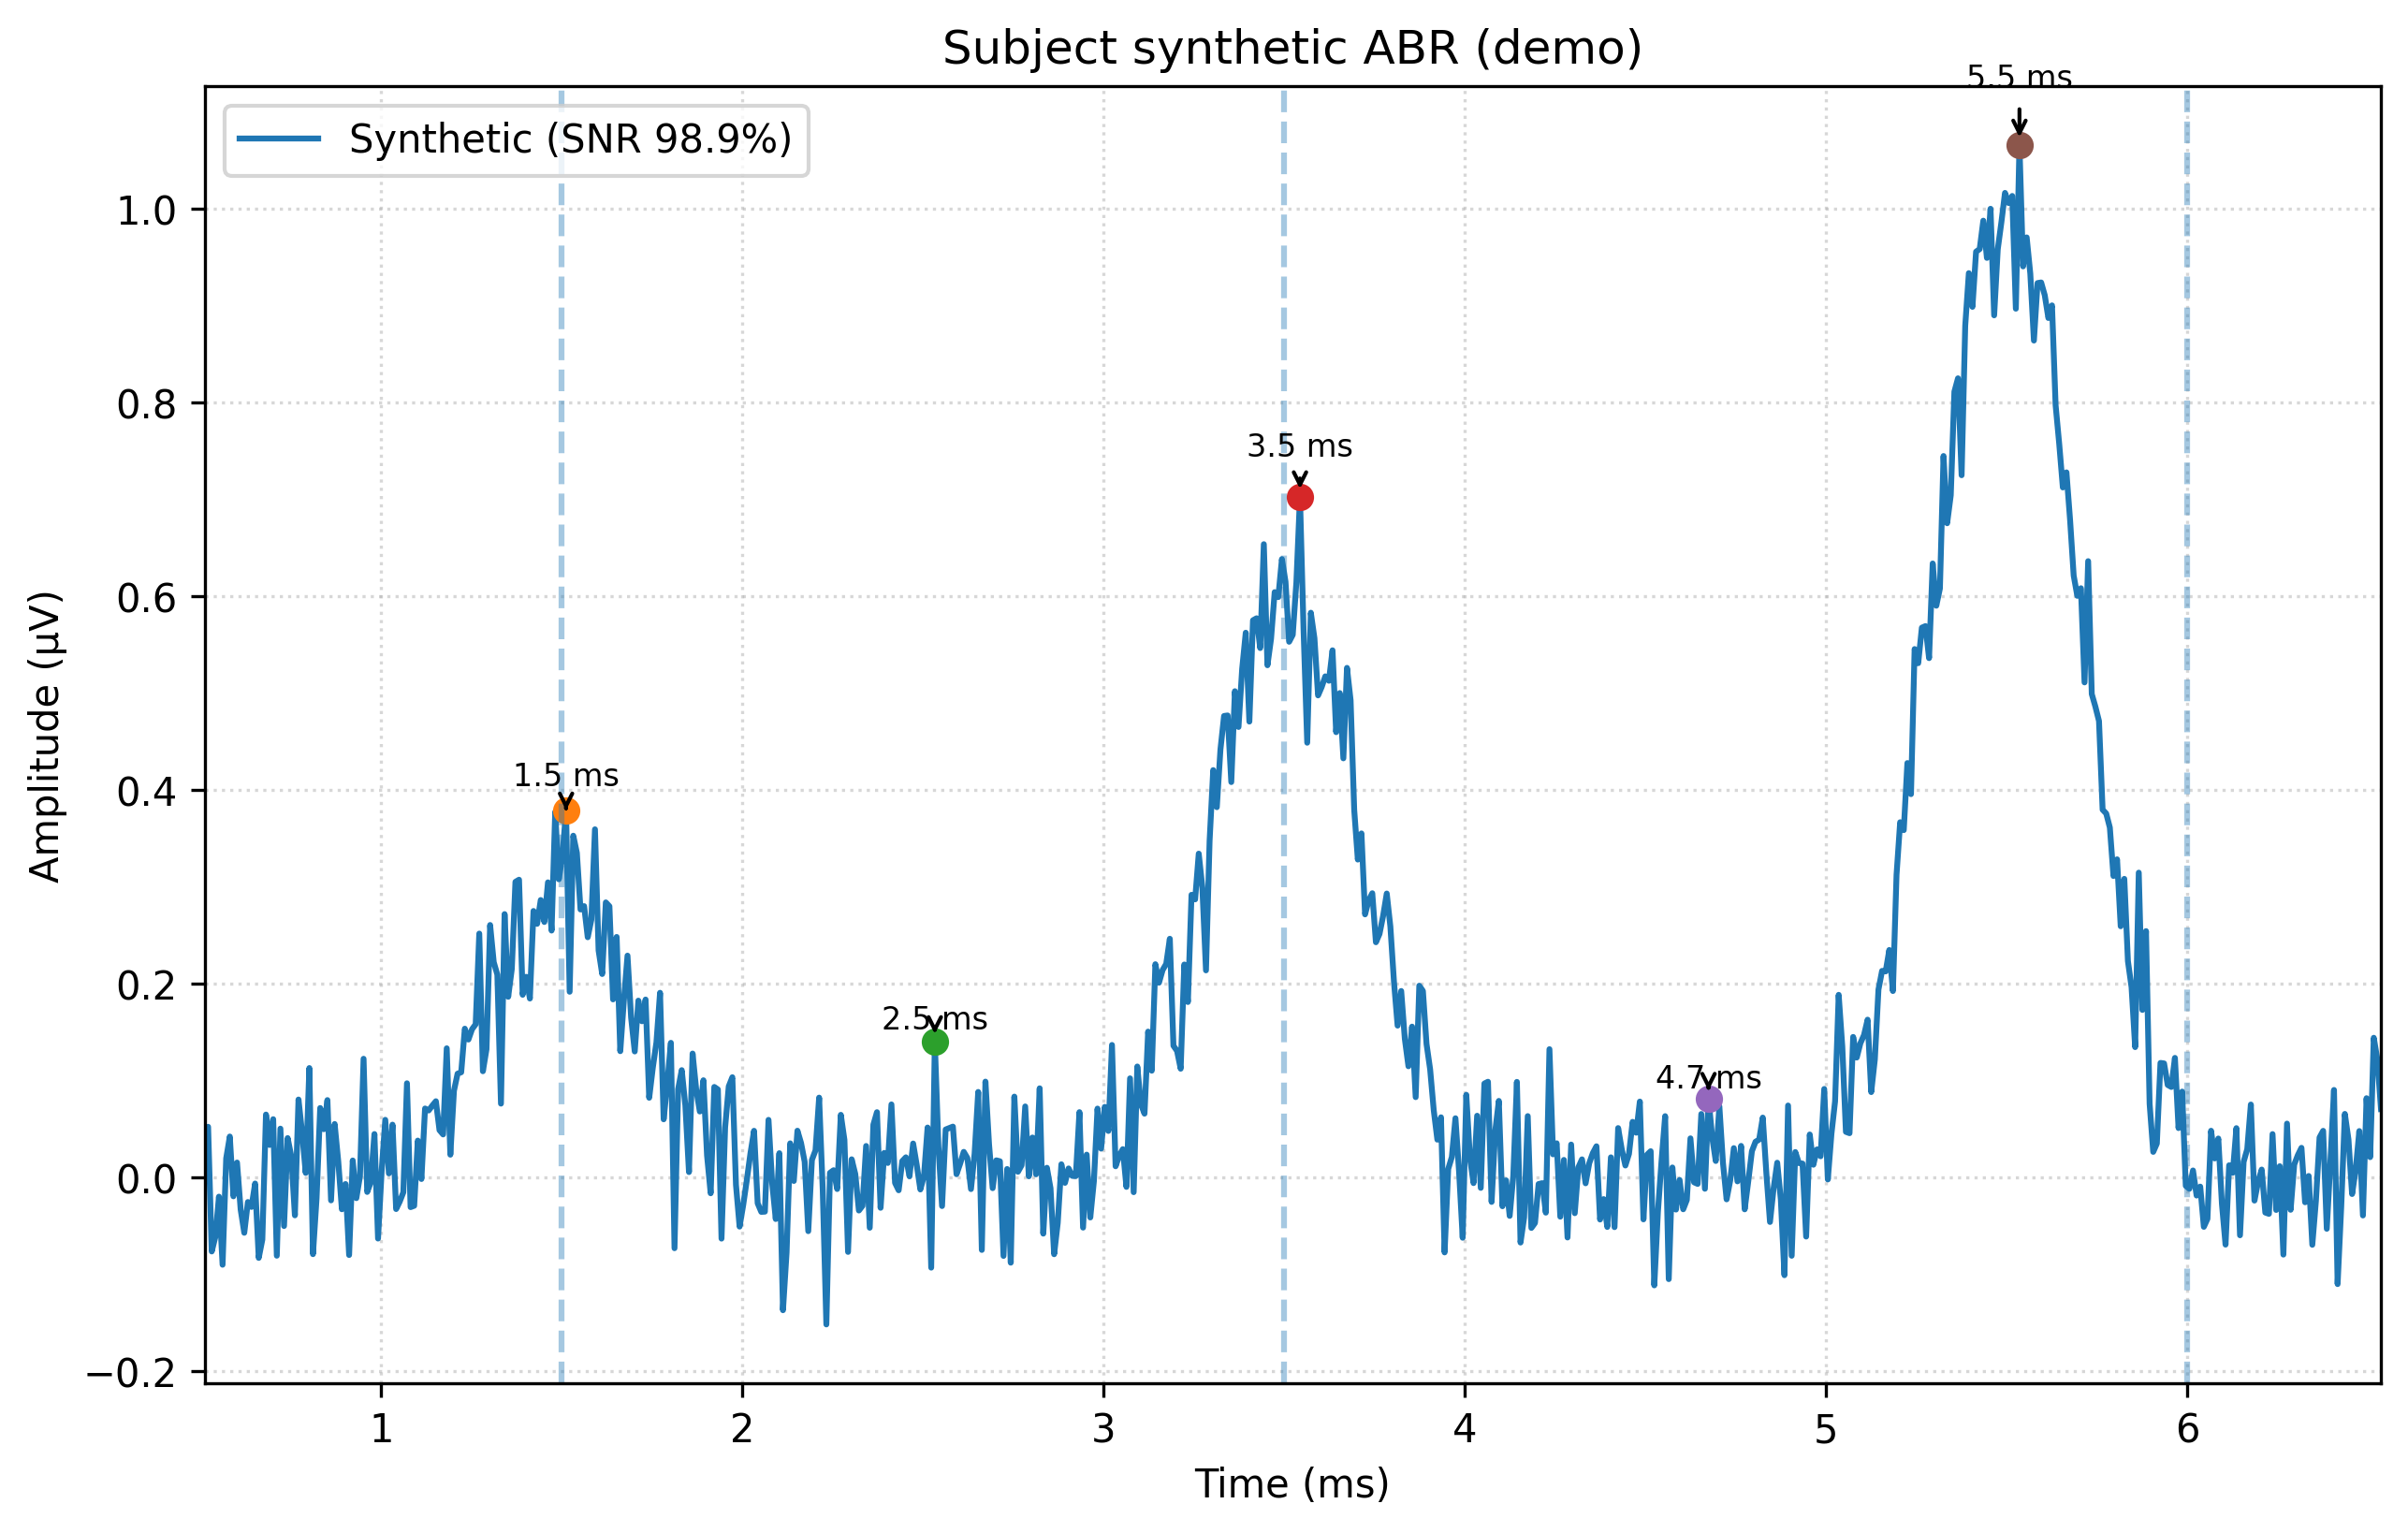

In [10]:
# Prepare single-channel inputs for plot_abr
# Wrap data and peaks into lists as expected by the function
data_arr = [data_uv]
peaks_per_channel = [peaks]
ch_names = ['Synthetic']
# Optionally compute SNR; here we set a placeholder or import compute_snr_normalized
from toolbox.peak_finder import compute_snr_normalized
snr_list = [compute_snr_normalized(data_uv, times_ms)]

# Plot ABR waveform with annotated peaks
path = plot_abr(
    times_ms,
    data_arr,
    peaks_per_channel,
    ch_names,
    snr_list,
    subject_id='synthetic',
    mode='demo',
    outdir='./results/example_results',
    auto_zoom=True
)
print(f"Plot saved to {path}")

from IPython.display import Image, display
display(Image(filename=path))

---

## 5. QC Sensitivity Analysis

In [11]:
# Vary sigma to test QC robustness
test_sigmas = [0.03, 0.06, 0.12]
for sigma in test_sigmas:
    _, flag = _detect_peaks_abr(
        data_uv,
        times_ms,
        n_peaks=n_peaks,
        base_sigma=sigma
    )
    print(f"sigma={sigma} ms → QC passed={flag}")


sigma=0.03 ms → QC passed=True
sigma=0.06 ms → QC passed=True
sigma=0.12 ms → QC passed=True


---

## 6. Batch CLI Usage (Placeholder)

In [13]:
# Process a folder of ABR files (N subjects) and save outputs
!python -m toolbox.main abr /path/to/abr_folder/ subject01 --out results/abr/


/home/bmontt/miniconda3/bin/python3: Error while finding module specification for 'toolbox.main' (ModuleNotFoundError: No module named 'toolbox')


---